Classification
This notebook deals with whether a customer will default on the loan payment or not. The file consists of the following columns ClientId,Income,Age,Loan and Default.

ClientId can be dropped as it is not a deciding factor in whether a client will default on the loan payment or not. Income,Age and Loan are important features in decinding whether a client will default.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

confusion_matrix is used to show towards which class the model is biased towards. accuracy_score calculates the accuracy, but it does not show how good the model behaves.

train_test_split is used to split the features and output into train and test datasets. This is recommened as the model shoould not be tested on the complete dataset. If it is the model may overfit.

KNeighboursClassifier is the scikit-learn implement of the k-NN classification algorithm.

Reading the file using read_csv module of pandas.

In [8]:
data = pd.read_csv("/Users/matt/Dropbox/ipynb Jupyter Notebooks/credit data set.csv")
data.head()

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [3]:
# above 1 is default and 0 is not default

In [6]:
data.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   clientid  2000 non-null   int64  
 1   income    2000 non-null   float64
 2   age       1997 non-null   float64
 3   loan      2000 non-null   float64
 4   default   2000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 78.2 KB


In [9]:
# for all NaN entries I have filled with the mean of that column

In [10]:
data.fillna(data.mean(),inplace=True)

In [11]:
# drop client ID because it doesn't tell us anything

In [12]:
data.drop(columns="clientid",inplace=True)
data["age"] = data["age"].astype("int")
data.head()

,income,age,loan,default
0,66155.925095,59,8106.532131,0
1,34415.153966,48,6564.745018,0
2,57317.170063,63,8020.953296,0
3,42709.534201,45,6103.642260,0
4,66952.688845,18,8770.099235,1


split the dataset into features and output X variables are income, age and loan.  Y variable is the result default or not.

In [14]:
X = data[["income","age","loan"]]
y = data["default"]

Splitting the variables into a train and test set with 20% of features and default

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True)

Initializing the k-NN algorithm with minimum number of neighbors to classify in a class at 4

In [17]:
neigh = KNeighborsClassifier(n_neighbors=4)

model = neigh.fit(X_train,y_train)

y_pred = model.predict(X_test)

Print the MSE and Accuracy Score of the classifier.

In [20]:
print("A Mean Squared Error of {:.3f}".format(mean_squared_error(y_pred,y_test)))
print ("is achieved with a ")
print("Accuracy score:{:.3f}".format(accuracy_score(y_pred,y_test)*100))

A Mean Squared Error of 0.147
is achieved with a 
Accuracy score:85.250


In [21]:
results = pd.DataFrame({"Actual Values":y_test,
                        "Predicted Values":y_pred})
results.head()

,Actual Values,Predicted Values
1798,0,0
703,0,0
1827,0,0
1950,0,0
737,0,0


In [22]:
results.to_csv("k-NN.csv",index=False)

In [23]:
# print confusion matrix to find bias

<Figure size 432x288 with 0 Axes>

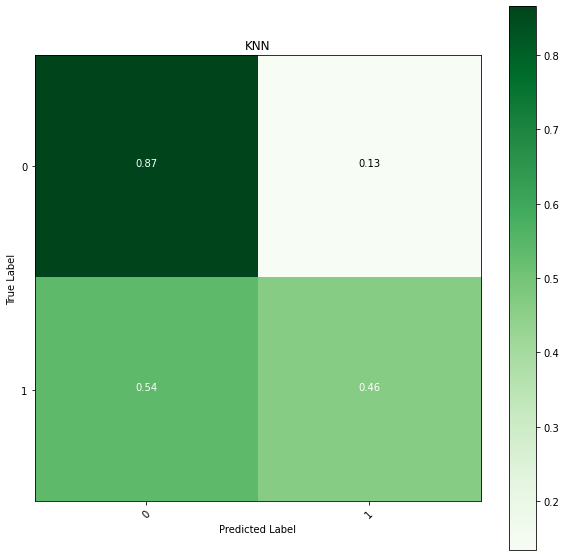

In [26]:
cm = confusion_matrix(y_pred,y_test)

def plot_confusion_matrix(cm,classes,title='Confusion Matrix',cmap=plt.cm.Greens):
    
    cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f'
    thresh = cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],fmt),
                horizontalalignment="center",
                color="white" if cm[i,j] > thresh else "black")
        pass
    
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    pass

classes=['0','1']

plt.figure()
plot_confusion_matrix(cm,classes,title="KNN")
plt.show()

The model is biased towards the customer not defaulting 

Now we shall Normalize the data

In [29]:
scaler = StandardScaler()

X = scaler.fit_transform(X)
X = pd.DataFrame(X)
X.columns = ["income","age","loan"]
X.head()

,income,age,loan
0,1.453934,1.373508,1.202819
1,-0.762176,0.565152,0.696427
2,0.836821,1.667456,1.174711
3,-0.183070,0.344691,0.544980
4,1.509563,-1.639458,1.420765


In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True)

Make a model with the new normalized data

In [31]:
neigh = KNeighborsClassifier(n_neighbors=3)

model = neigh.fit(X_train,y_train)

y_pred = model.predict(X_test)

In [33]:
print("A Mean Squared Error: {:.3f}".format(mean_squared_error(y_pred,y_test)))
print("Is achieved with an")
print("Accuracy score of: {:.3f}".format(accuracy_score(y_pred,y_test)*100))

A Mean Squared Error: 0.020
Is achieved with an
Accuracy score of: 98.000


In [34]:
results_normalized = pd.DataFrame({"Actual Values":y_test,
                        "Predicted Values":y_pred})
results_normalized.head()

,Actual Values,Predicted Values
1698,0,0
967,1,1
1749,0,0
1267,0,0
395,0,0


In [35]:
results_normalized.to_csv("k-NN_normalized.csv",index=False)

Now plot the new confusion matrix

<Figure size 432x288 with 0 Axes>

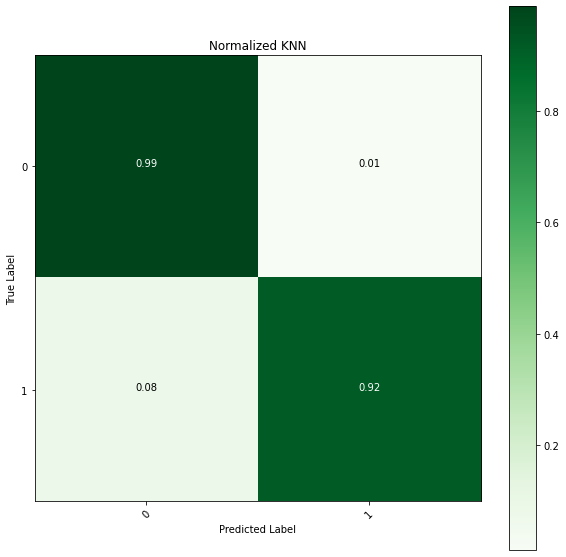

In [37]:
cm = confusion_matrix(y_pred,y_test)

def plot_confusion_matrix(cm,classes,title='Confusion Matrix',cmap=plt.cm.Greens):
    
    cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f'
    thresh = cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],fmt),
                horizontalalignment="center",
                color="white" if cm[i,j] > thresh else "black")
        pass
    
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    pass

classes=['0','1']

plt.figure()
plot_confusion_matrix(cm,classes,title="Normalized KNN");
plt.show();

This is a much better model and the data from this set should be used to see who will default. 